In [1]:
pip install --upgrade mxnet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch==1.7.1+cpu torchvision==0.8.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade gluoncv

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install "opencv-python-headless<4.3"

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import cv2
import mxnet as mx
from mxnet.gluon.data.vision import transforms
import gluoncv

# using cpu
ctx = mx.cpu(0)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.7.1+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [6]:
url = 'https://raw.githubusercontent.com/KuangHaofei/GluonCV_Test/master/monodepthv2/tutorials/test_img.png'
filename = 'test_img.png'
gluoncv.utils.download(url, filename, True)

729KB [00:00, 7021.04KB/s]                         


'test_img.png'

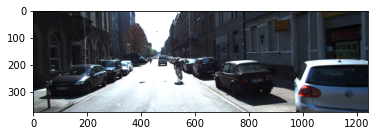

In [7]:
import PIL.Image as pil
img = pil.open(filename).convert('RGB')

from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [8]:
original_width, original_height = img.size
feed_height = 192
feed_width = 640

img = img.resize((feed_width, feed_height), pil.LANCZOS)
img = transforms.ToTensor()(mx.nd.array(img)).expand_dims(0).as_in_context(context=ctx)

In [9]:
model = gluoncv.model_zoo.get_model('monodepth2_resnet18_kitti_stereo_640x192',
                                    pretrained_base=False, ctx=ctx, pretrained=True)

In [17]:
outputs = model.predict(img)
disp = outputs[("disp", 0)]
disp_resized = mx.nd.contrib.BilinearResize2D(disp, height=original_height, width=original_width)

In [21]:
disp_resized[0][0]


[[0.00473607 0.00330461 0.0020231  ... 0.07168055 0.071731   0.07177679]
 [0.00473284 0.00330245 0.00202183 ... 0.07164553 0.07169555 0.07174067]
 [0.00472989 0.00330056 0.00202083 ... 0.07161332 0.07166304 0.07170764]
 ...
 [0.00612901 0.00439025 0.00282354 ... 0.16463242 0.16452889 0.16439572]
 [0.00611381 0.00438125 0.0028201  ... 0.16455778 0.16445266 0.1643138 ]
 [0.00609527 0.00436999 0.00281543 ... 0.1644862  0.16437805 0.16423182]]
<NDArray 375x1242 @cpu(0)>

In [12]:
import matplotlib as mpl
import matplotlib.cm as cm

In [21]:
disp_resized_np = disp_resized.squeeze().as_in_context(mx.cpu()).asnumpy()
im = pil.fromarray(disp_resized_np)

im.save('test_output_depth.png')

OSError: cannot write mode F as PNG

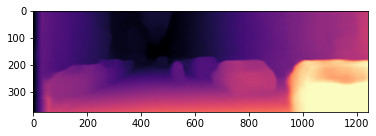

In [13]:
import matplotlib as mpl
import matplotlib.cm as cm
disp_resized_np = disp_resized.squeeze().as_in_context(mx.cpu()).asnumpy()
vmax = np.percentile(disp_resized_np, 95)
normalizer = mpl.colors.Normalize(vmin=disp_resized_np.min(), vmax=vmax)
mapper = cm.ScalarMappable(norm=normalizer, cmap='magma')
colormapped_im = (mapper.to_rgba(disp_resized_np)[:, :, :3] * 255).astype(np.uint8)
im = pil.fromarray(colormapped_im)
im.save('test_output.png')

import matplotlib.image as mpimg
disp_map = mpimg.imread('test_output.png')
plt.imshow(disp_map)
plt.show()

In [15]:
colormapped_im

array([[[  3,   3,  17],
        [  1,   1,  11],
        [  1,   0,   7],
        ...,
        [197,  60, 116],
        [198,  60, 115],
        [198,  60, 115]],

       [[  3,   3,  17],
        [  1,   1,  11],
        [  1,   0,   7],
        ...,
        [197,  60, 116],
        [197,  60, 116],
        [198,  60, 115]],

       [[  3,   3,  17],
        [  1,   1,  11],
        [  1,   0,   7],
        ...,
        [197,  60, 116],
        [197,  60, 116],
        [197,  60, 116]],

       ...,

       [[  4,   4,  21],
        [  2,   2,  15],
        [  1,   1,   9],
        ...,
        [251, 252, 191],
        [251, 252, 191],
        [251, 252, 191]],

       [[  4,   4,  21],
        [  2,   2,  15],
        [  1,   1,   9],
        ...,
        [251, 252, 191],
        [251, 252, 191],
        [251, 252, 191]],

       [[  4,   4,  21],
        [  2,   2,  15],
        [  1,   1,   9],
        ...,
        [251, 252, 191],
        [251, 252, 191],
        [251, 252, 191]]

In [13]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [16]:
#pip install opencv-contrib-python

In [ ]:
import imageio as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [16]:
import open3d as o3d
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
  
def pointcloud(depth, fov):                                                             # -> 1 fov=40
    fy = fx = 0.5 / np.tan(fov * 0.5) # assume aspectRatio is one.
    height = depth.shape[0]
    print(height)
    width = depth.shape[1]
    print(width)
    mask = np.where(depth >=0)
    print("Length of mask:" +str(len(mask)))
    print(mask)
    x = mask[1]
    print(x)
    y = mask[0]
    
    normalized_x = (x.astype(np.float32) - width * 0.5) / width
    normalized_y = (y.astype(np.float32) - height * 0.5) / height
    
    world_x = normalized_x * depth[y, x] / fx
    world_y = normalized_y * depth[y, x] / fy
    world_z = depth[y, x]
    ones = np.ones(world_z.shape[0], dtype=np.float32)

    return np.vstack((world_x, world_y, world_z, ones)).T


with Image.open("unnamed.png") as im:
    rgbd_image=np.array(im)
    rgbd_image=rgbd_image[:,:,0]
    print(rgbd_image.shape)


point_cloud=pointcloud(rgbd_image,40)  ######
pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:3])


o3d.visualization.draw_geometries([pcd])  # will not work with colab

OSError: libGL.so.1: cannot open shared object file: No such file or directory

In [55]:
from PIL import Image
import numpy as np
# 1. Read image

 
# 2. Convert image to NumPy array
arr = np.asarray(disp_map)
print(arr.shape)
# (771, 771, 3)
# 3. Convert 3D array to 2D list of lists
lst = []
for row in arr:
    tmp = []
    for col in row:
        tmp.append(str(col))
    lst.append(tmp)
# 4. Save list of lists to CSV
with open('my_file.csv', 'w') as f:
    for row in lst:
        f.write(','.join(row) + '\n')

(375, 1242, 3)


In [44]:
disp_resized_np[0]

array([0.00473607, 0.00330461, 0.0020231 , ..., 0.07168055, 0.071731  ,
       0.07177679], dtype=float32)